# Overview 

Managers at a real estate investment firm seek the top 5 zip codes to invest in. This analysis seeks to identify those top 5 zip codes based on size, return on investment, and Sharpe ratio.

# Business Problem

The firm requires insight on the best zip codes to invest in. The following time series analysis will identify the top 5 zip codes based on ROI. These top 5 will be analyzed and modeled in order to draw accurate forecasts of the future. The models will forecast over a 3 year investment horizon. Each forecasted zip code will be evaluated on a risk adjusted basis to provide a recommendation on where to invest. 

In [1]:
#retrieve data set
import pandas as pd
ts = pd.read_csv('zillow_data.csv')
ts.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [2]:
ts

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


The data is in wide format. In order to properly analyze and model, the data needs to be "melted" into long format. Then, I will narrow down the 14,723 zip codes into the top 5 zip codes according to return on investment. 
<br>

The Data (excluding wide format time columns)
<br>

| Column Name | Description                            |
|-------------|----------------------------------------|
| Region Name | identifies the region code             |
| City        | city that the zip code belongs to      |
| State       | state that zip code belongs to         |
| Metro       | metro area that zip code belongs to    |
| CountyName  | county that zip code belongs to        |
| SizeRank    | rank according to size of the zip code |
| RegionID    | zip code of the region                 |
<br>

Here, we are most interested in RegionID and the time values. Preprocessing will seek to melt and format the data to only include these values.

# Data Preprocessing

In [3]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

In [4]:

#out of top 50 sizerank:
    #find top 5 ROI ((value today / value original) - 1 zip codes
    #forecast 3 year investment horizon for each zipcode
    #refine model
    #choose best zipcode to invest


In [5]:
#select top 50 sized zipcodes according to sizerank
top_50_size = ts.iloc[:50]
top_50_size

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
8,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500


In [6]:
#calculate ROI for each zip code
top_50_size['ROI'] = (top_50_size['2018-04'] / top_50_size['1996-04']) - 1
top_50_size.head()

<ipython-input-6-8edc18217b11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_50_size['ROI'] = (top_50_size['2018-04'] / top_50_size['1996-04']) - 1


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,2.083782
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,310000,312500,314100,315000,316600,318100,319600,321100,321800,0.365295
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320600,320200,320400,320800,321200,321200,323000,326900,329900,0.567966
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,1.623971
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119400,120000,120300,120300,120300,120300,120500,121000,121500,0.571798


In [7]:
#select 10 largest ROI
top_50_size['ROI'].nlargest(n=10)

29    6.330859
33    5.030201
10    4.945679
30    4.774809
47    4.195133
9     3.978460
46    3.323709
12    3.297147
13    3.284514
15    3.040656
Name: ROI, dtype: float64

In [8]:
top5 = top_50_size.iloc[[29, 33, 10, 30, 47]]
top5

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI
29,66126,20002,Washington,DC,Washington,District of Columbia,30,94300.0,94000.0,93700.0,...,668000,672200,673100,674600,678200,680900,683000,687500,691300,6.330859
33,66133,20009,Washington,DC,Washington,District of Columbia,34,178800.0,179200.0,179600.0,...,1027500,1034300,1040500,1047400,1055400,1065900,1076400,1081000,1078200,5.030201
10,62037,11226,New York,NY,New York,Kings,11,162000.0,162300.0,162600.0,...,851000,853900,870000,885100,887800,890500,901700,930700,963200,4.945679
30,96027,90046,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,31,340600.0,341700.0,343000.0,...,1861100,1888600,1903900,1907500,1922100,1952400,1974500,1975900,1966900,4.774809
47,62040,11230,New York,NY,New York,Kings,48,230100.0,230800.0,231500.0,...,1082700,1082800,1084900,1091200,1102400,1120200,1141600,1170000,1195400,4.195133


After calculating ROI over the historical period, we arrive at the 5 zip codes with the best returns. Here, we will analyze these 5 zip codes and forecast 3 years into the future.

# Reshape from Wide to Long Format

In [9]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName', 'ROI'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [134]:
#melt data to reformat
melted_ts = melt_data(top5)
melted_ts.head()

,value
time,
1996-04-01,201160.0
1996-05-01,201600.0
1996-06-01,202080.0
1996-07-01,202620.0
1996-08-01,203200.0


<AxesSubplot:xlabel='time'>

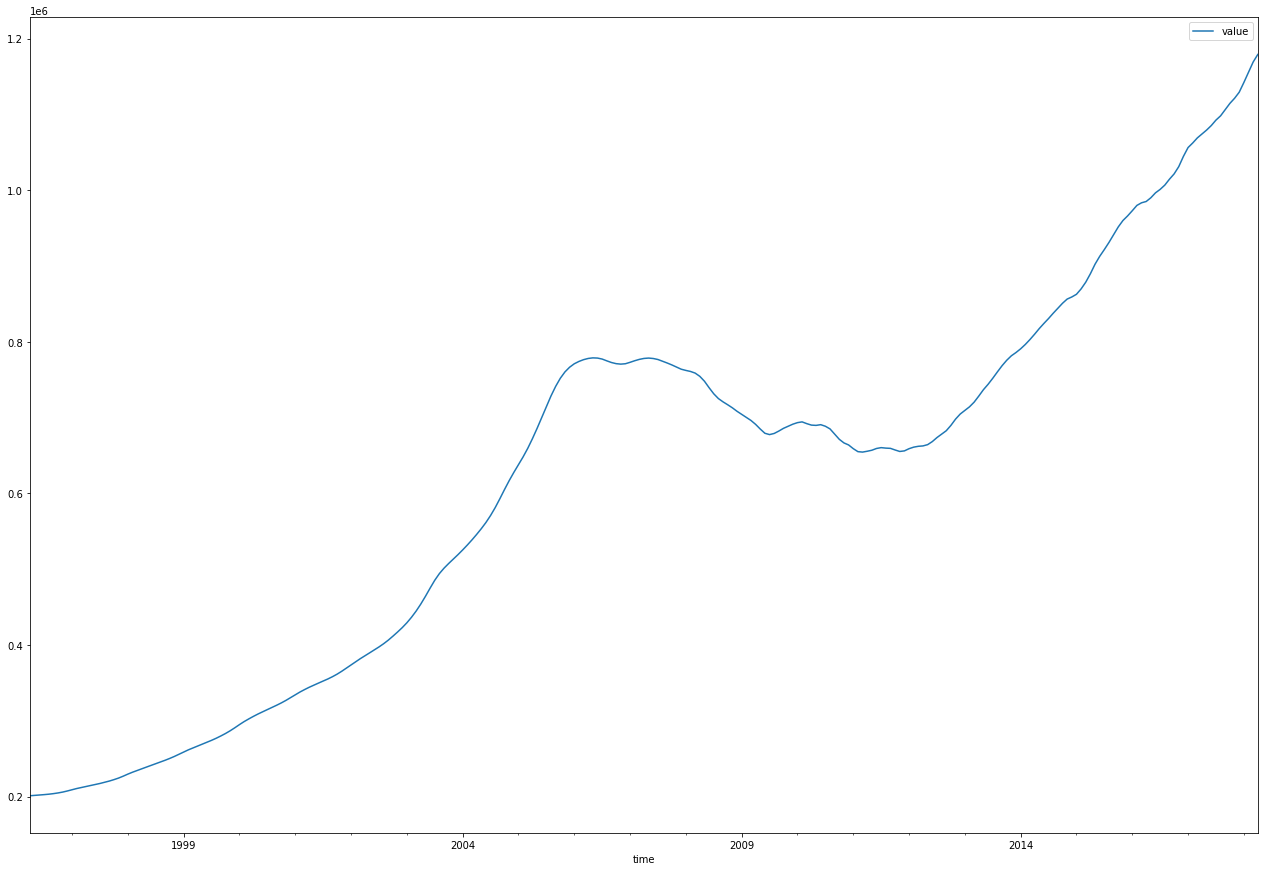

In [11]:
melted_ts.plot(figsize=(22,15))

Positive trend, with cyclical movement corresponding to the business cycle of recession (i.e. post 2008 lows) and growth. The last few years of data show a breakout of housing prices, likely due to unprecedented supply shortages and low interest rates.

In [12]:
#separate each region
region1 = top5.iloc[[0]]
region2 = top5.iloc[[1]]
region3 = top5.iloc[[2]]
region4 = top5.iloc[[3]]
region5 = top5.iloc[[4]]

<AxesSubplot:xlabel='time'>

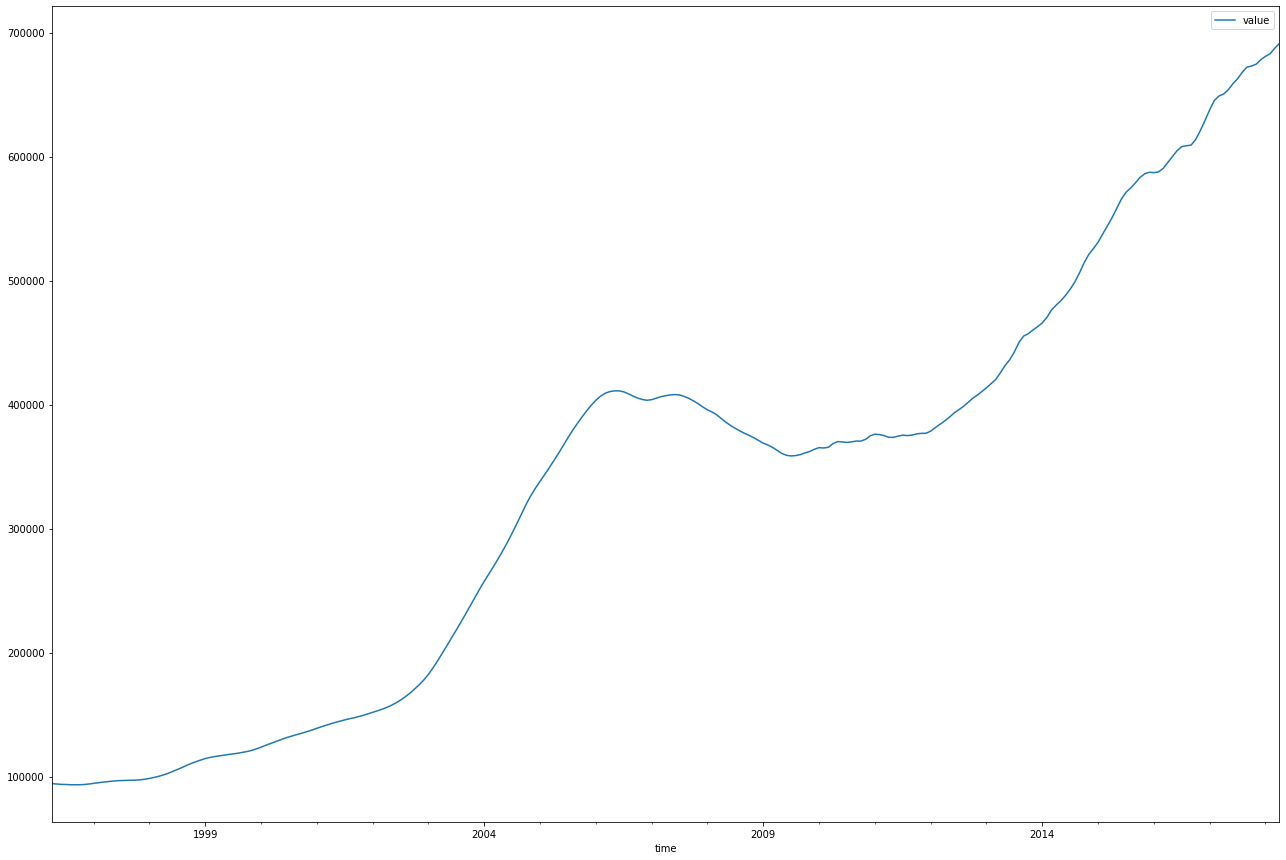

In [13]:
#melt and visualize region 1
melted_r1 = melt_data(region1)
melted_r1.plot(figsize=(22,15))

<AxesSubplot:xlabel='time'>

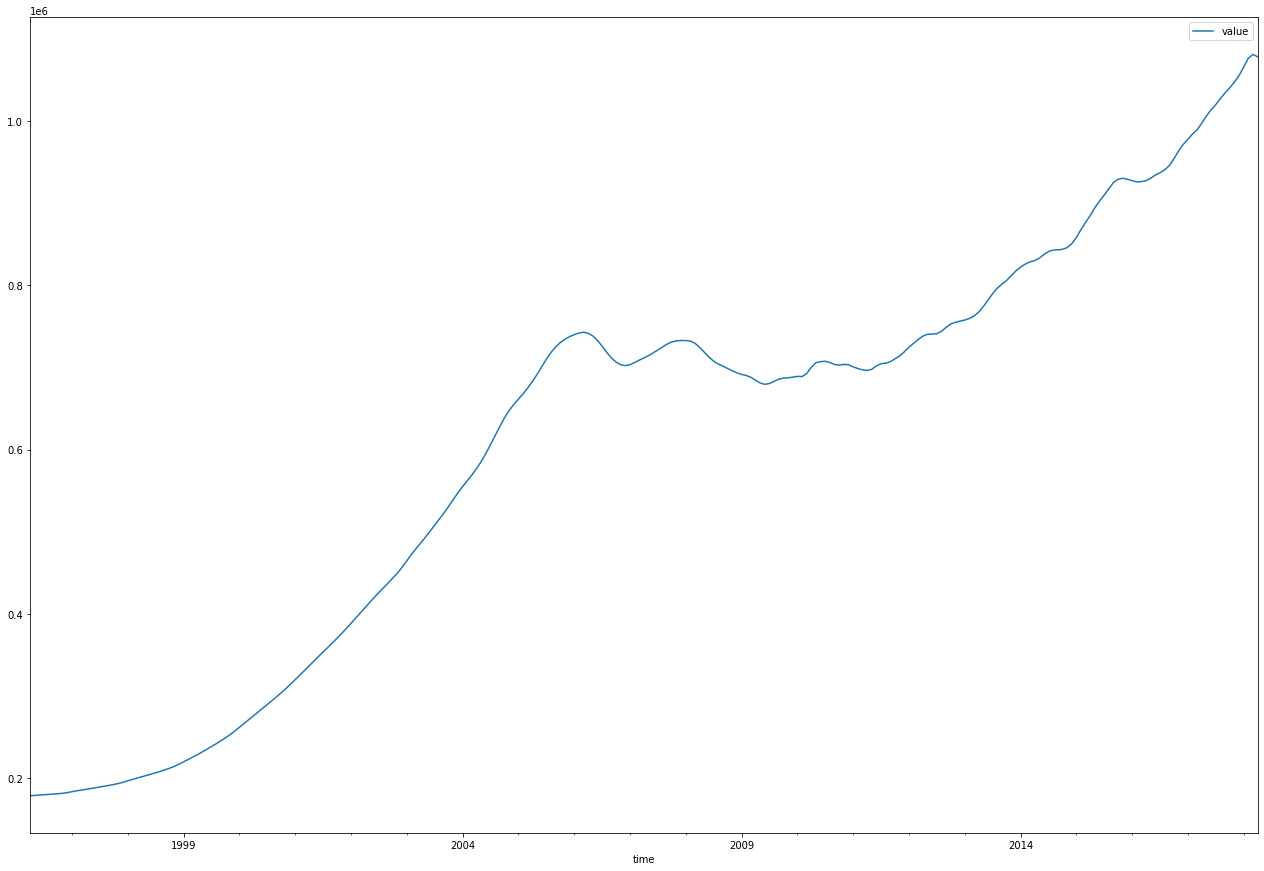

In [14]:
#melt and visualize region 2
melted_r2 = melt_data(region2)
melted_r2.plot(figsize=(22,15))

<AxesSubplot:xlabel='time'>

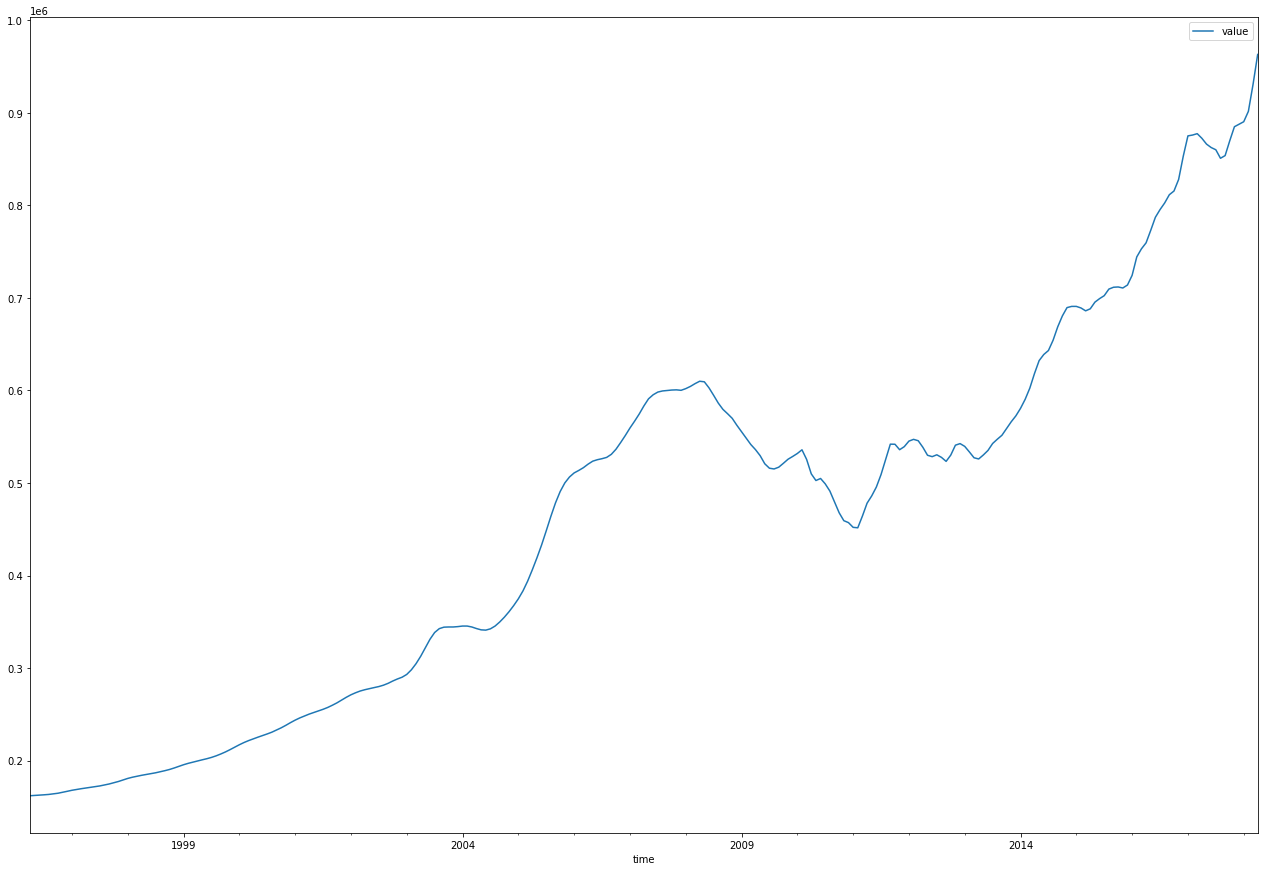

In [15]:
#melt and visualize region 3
melted_r3 = melt_data(region3)
melted_r3.plot(figsize=(22,15))

<AxesSubplot:xlabel='time'>

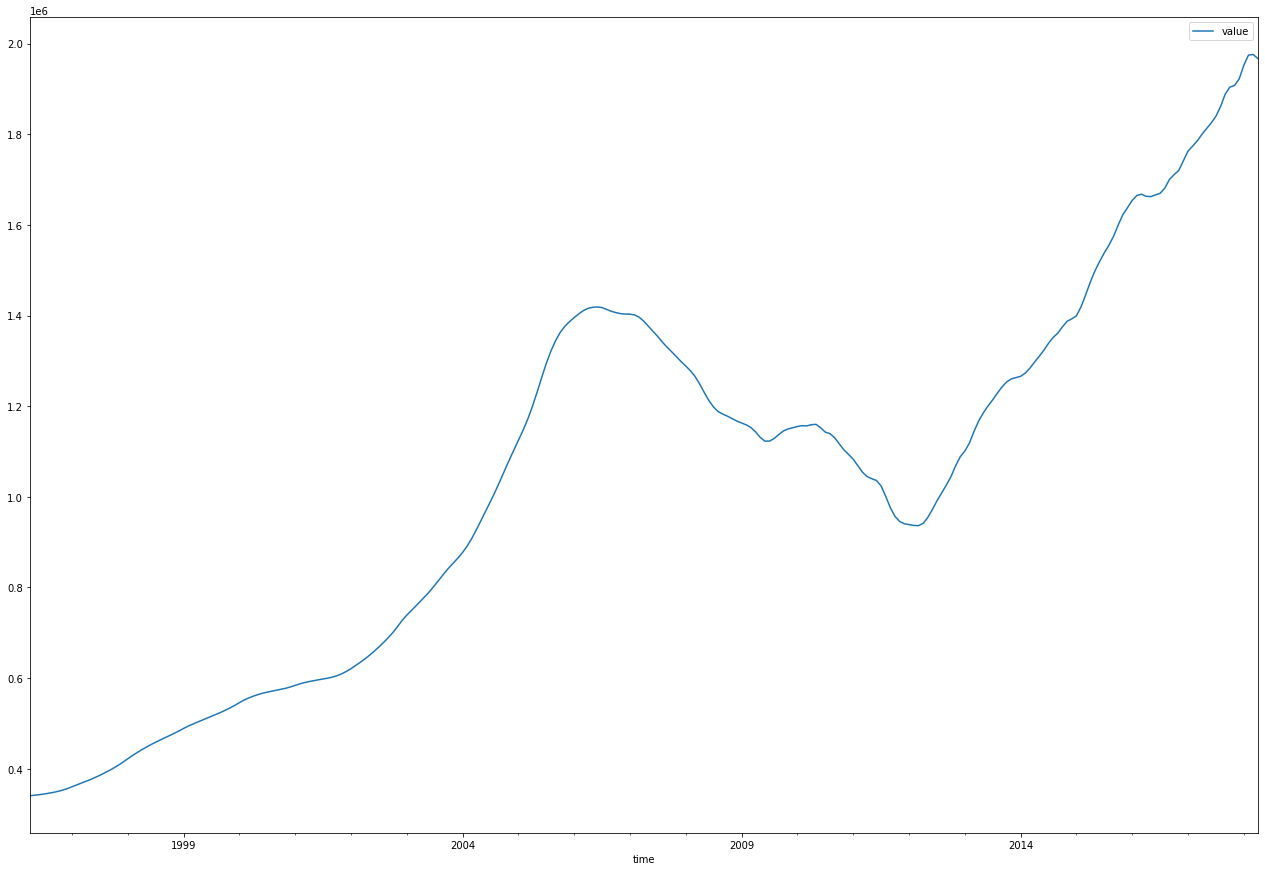

In [16]:
#melt and visualize region 4
melted_r4 = melt_data(region4)
melted_r4.plot(figsize=(22,15))

<AxesSubplot:xlabel='time'>

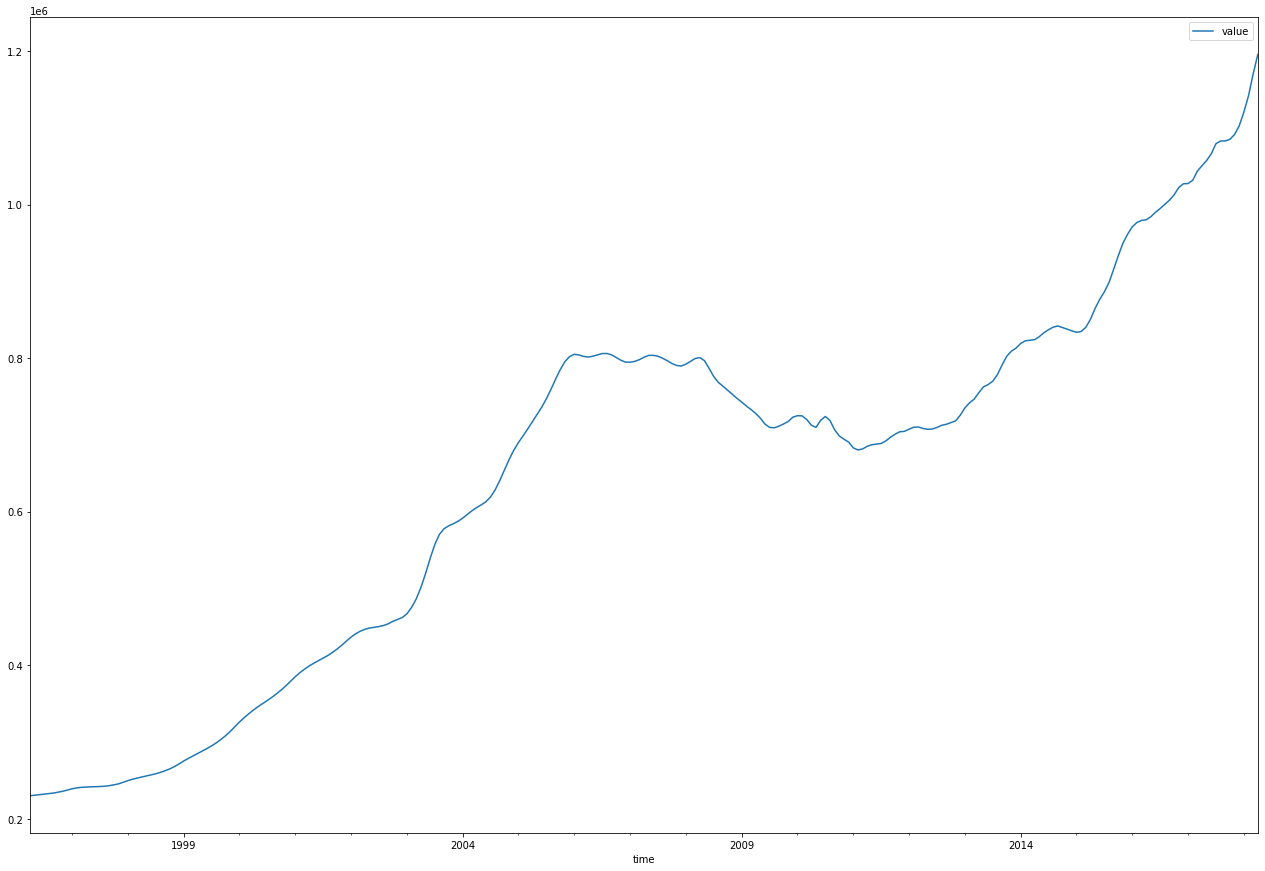

In [17]:
#melt and visualize region 5
melted_r5 = melt_data(region5)
melted_r5.plot(figsize=(22,15))

Each region generally follows the boom and bust cycle previously discussed. Some regions weather the post 2008 lows better than others, indicated by the lower trough. However, all regions trend upward in the last few years.

# EDA and Visualization

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
#check for stationarity
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=8, center=False).mean()
    roll_std = TS.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller test
    dftest = adfuller(TS) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None


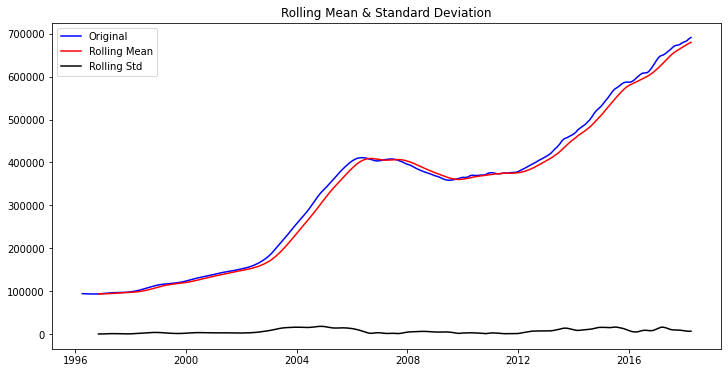

Results of Dickey-Fuller Test: 

Test Statistic                  -0.546137
p-value                          0.882694
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [19]:
#check stationarity r1
stationarity_check(melted_r1)

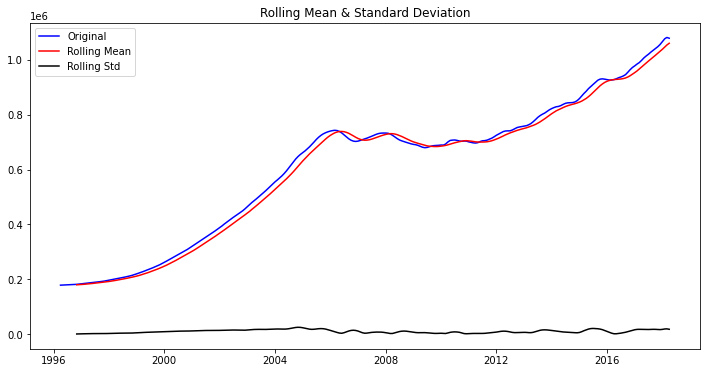

Results of Dickey-Fuller Test: 

Test Statistic                  -1.118915
p-value                          0.707470
#Lags Used                      14.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64


In [20]:
#check stationarity r2
stationarity_check(melted_r2)

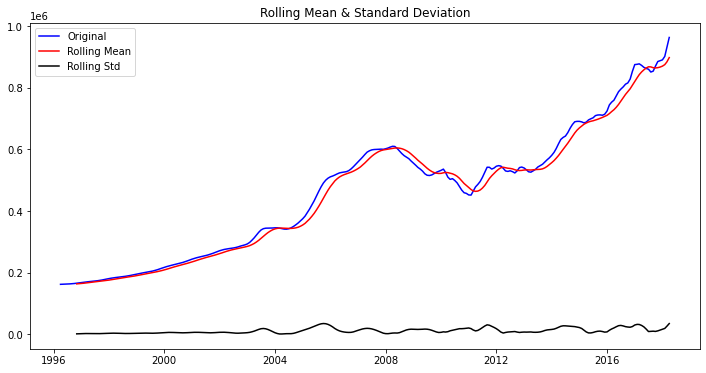

Results of Dickey-Fuller Test: 

Test Statistic                   0.625410
p-value                          0.988225
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [21]:
#check stationarity r3
stationarity_check(melted_r3)

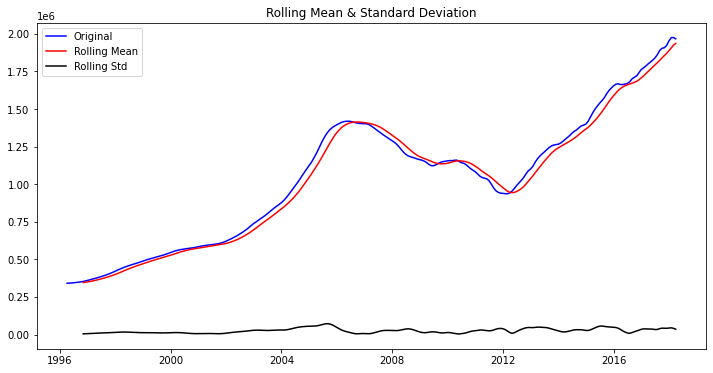

Results of Dickey-Fuller Test: 

Test Statistic                  -0.975326
p-value                          0.762157
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [22]:
#check stationarity r4
stationarity_check(melted_r4)

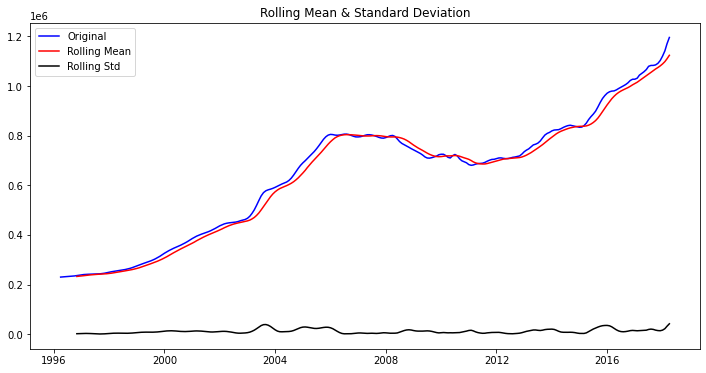

Results of Dickey-Fuller Test: 

Test Statistic                   0.223604
p-value                          0.973555
#Lags Used                      13.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


In [23]:
#check stationarity r5
stationarity_check(melted_r5)

Each series fails to reject Dickey-Fuller test. All non-stationary. Model's will require differencing and/or moving average terms. 
<br>

Next, seasonal_decompose will help visualize the decomposed time series.

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [25]:
#decompose r1
decomposition_r1 = seasonal_decompose(melted_r1)

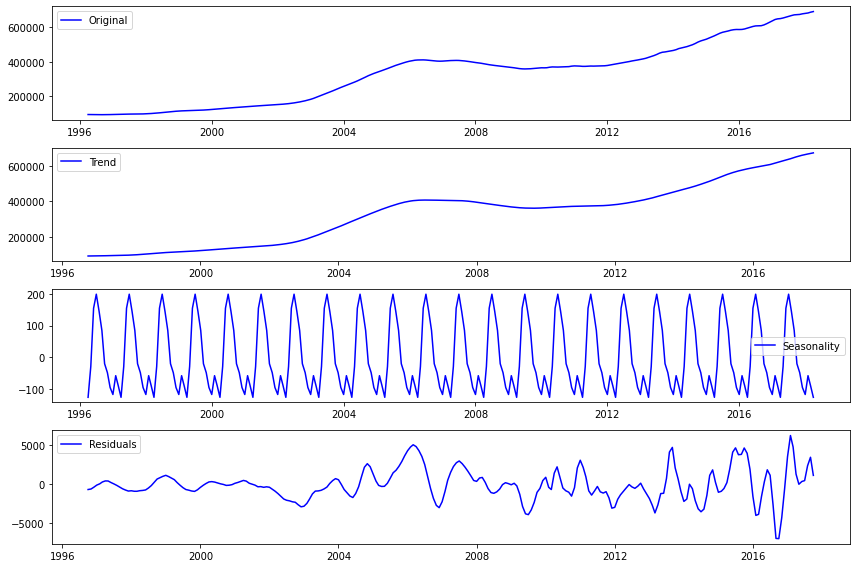

In [26]:
trend_r1 = decomposition_r1.trend
seasonal_r1 = decomposition_r1.seasonal
residual_r1 = decomposition_r1.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(melted_r1, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_r1, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_r1,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_r1, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

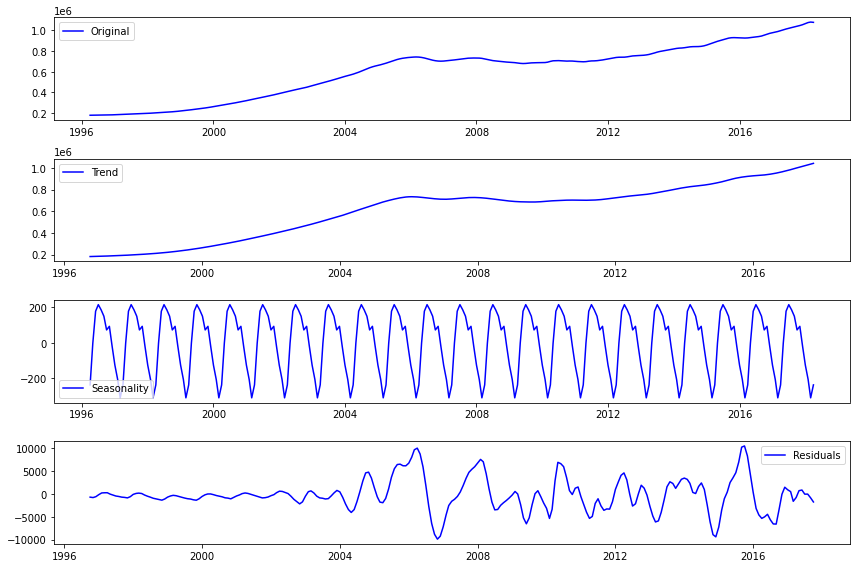

In [27]:
decomposition_r2 = seasonal_decompose(melted_r2)

trend_r2 = decomposition_r2.trend
seasonal_r2 = decomposition_r2.seasonal
residual_r2 = decomposition_r2.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(melted_r2, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_r2, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_r2,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_r2, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

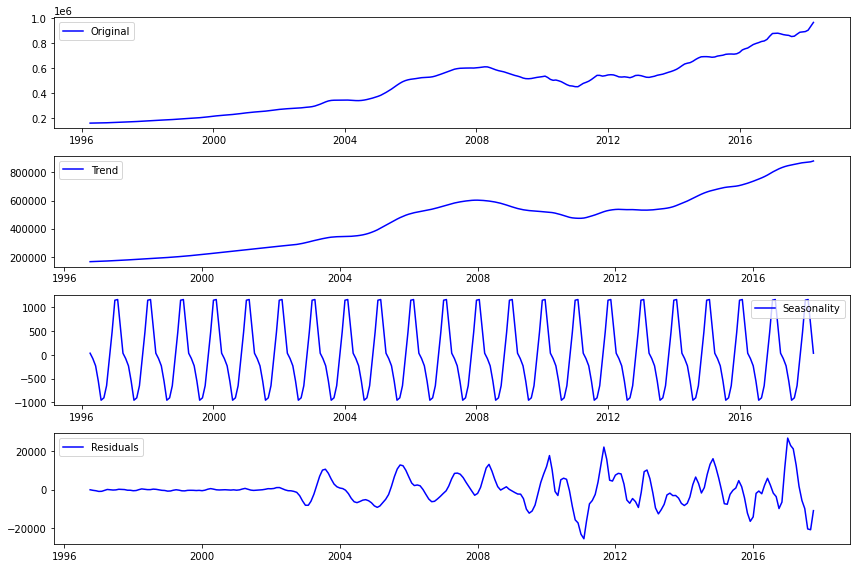

In [28]:
decomposition_r3 = seasonal_decompose(melted_r3)

trend_r3 = decomposition_r3.trend
seasonal_r3 = decomposition_r3.seasonal
residual_r3 = decomposition_r3.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(melted_r3, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_r3, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_r3,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_r3, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

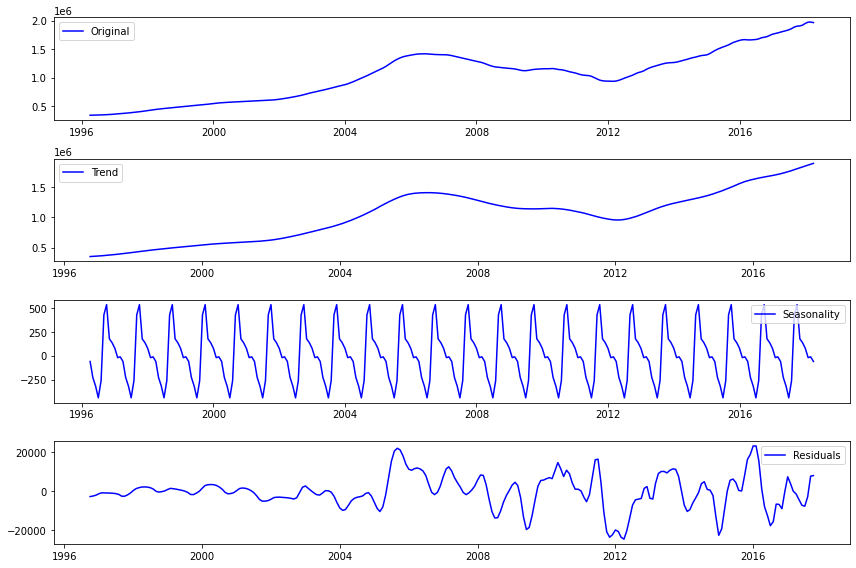

In [29]:
decomposition_r4 = seasonal_decompose(melted_r4)

trend_r4 = decomposition_r4.trend
seasonal_r4 = decomposition_r4.seasonal
residual_r4 = decomposition_r4.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(melted_r4, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_r4, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_r4,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_r4, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

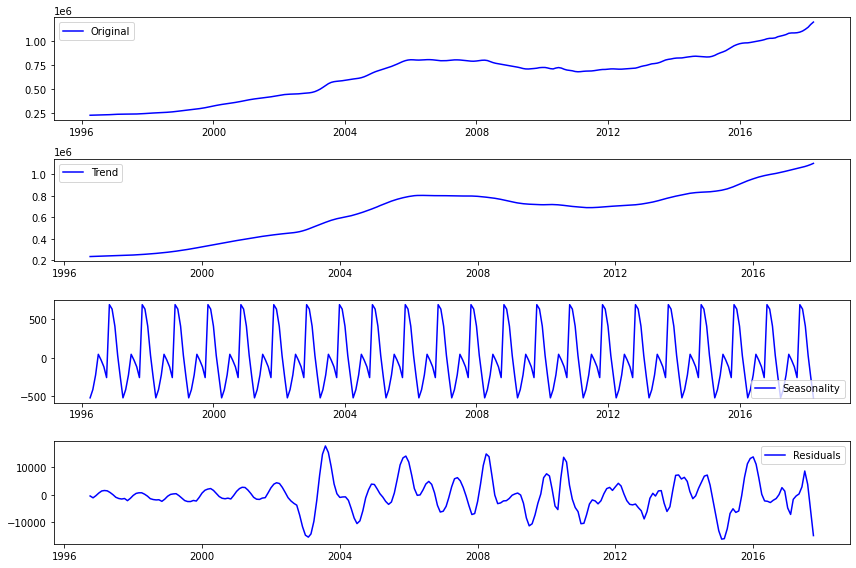

In [30]:
decomposition_r5 = seasonal_decompose(melted_r5)

trend_r5 = decomposition_r5.trend
seasonal_r5 = decomposition_r5.seasonal
residual_r5 = decomposition_r5.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(melted_r5, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_r5, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_r5,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_r5, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

Upward trend holds across all regions, with the appearance of seasonality on an annual basis. Seasonality and trend will be addressed with the autoarima package.

In [31]:
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [32]:
import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

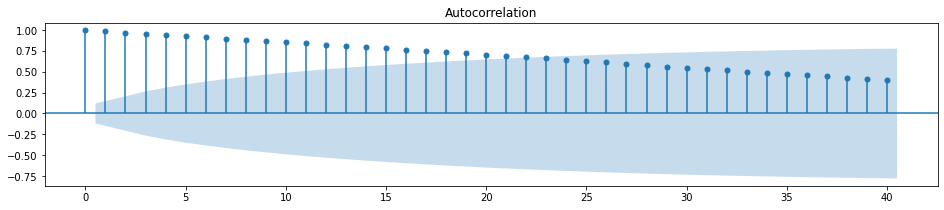

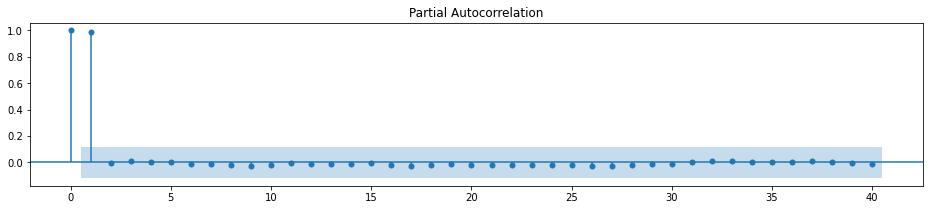

In [33]:
#Plot afc and pacf
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(melted_r5, ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(melted_r5, ax=ax, lags=40);

Both ACF and PACF tail off, indicating an ARMA model with both AR and MA parameters is best:

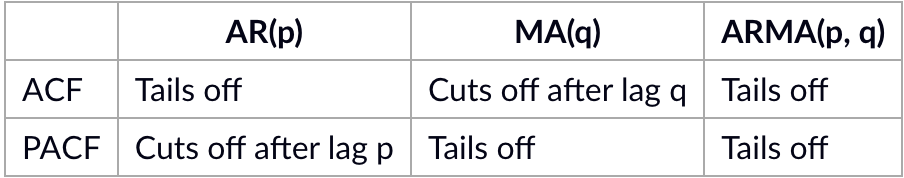
<br>

The AutoArima package will perform an exhaustive stepwise search of the best parameters. 

# ARIMA Modeling

In [34]:
from pmdarima.arima import auto_arima

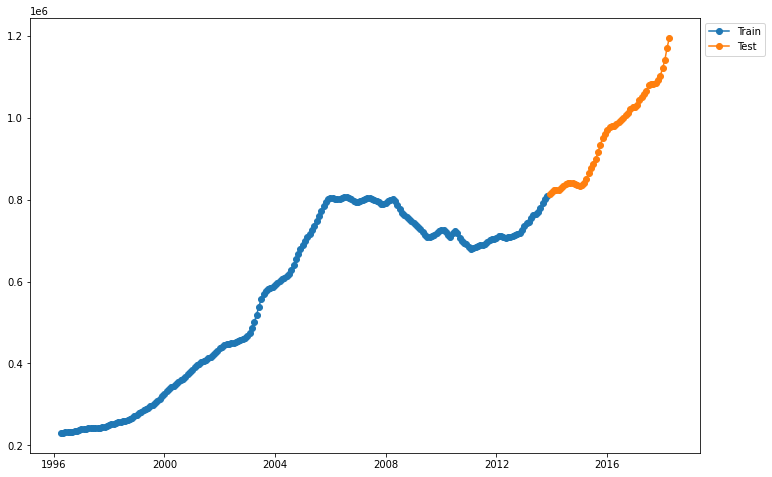

In [35]:
# Train Test Split Index
train_size = 0.8
split_idx = round(len(melted_r5)* train_size)
split_idx

# Split
r5_train = melted_r5.iloc[:split_idx]
r5_test = melted_r5.iloc[split_idx:]

# Visualize split
fig,ax= plt.subplots(figsize=(12,8))
kws = dict(marker='o')
plt.plot(r5_train, label='Train', **kws)
plt.plot(r5_test, label='Test', **kws)
ax.legend(bbox_to_anchor=[1,1]);

In [36]:
#stepwise search of best parameters according to AIC
r5_autoarima = auto_arima(r5_train, start_p=0, start_q=0, d=None,
                          information_criterion='aic', max_d=3, max_q=3,
                          max_p=3, start_P=0, start_Q=0, D=None, max_P=3, max_Q=3,
                          max_D=3, trace=True, stepwise=True 
                          
                         )

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3840.044, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=3840.678, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=3846.950, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=3849.237, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=3842.000, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.208 seconds


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


In [37]:
r5_autoarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  212
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1919.022
Date:                Wed, 17 Aug 2022   AIC                           3840.044
Time:                        10:01:12   BIC                           3843.391
Sample:                             0   HQIC                          3841.397
                                - 212                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       5.02e+06   2.49e+05     20.166      0.000    4.53e+06    5.51e+06
===================================================================================
Ljung-Box (L1) (Q):                  37.38   Jarque-Bera (JB):               274.70
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              72.19   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The model search reduced the Akaike information criteria to 3840.044, and  returned the terms (0, 2, 0). Moreover, the sigma2 term achieved statistical significance. 

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


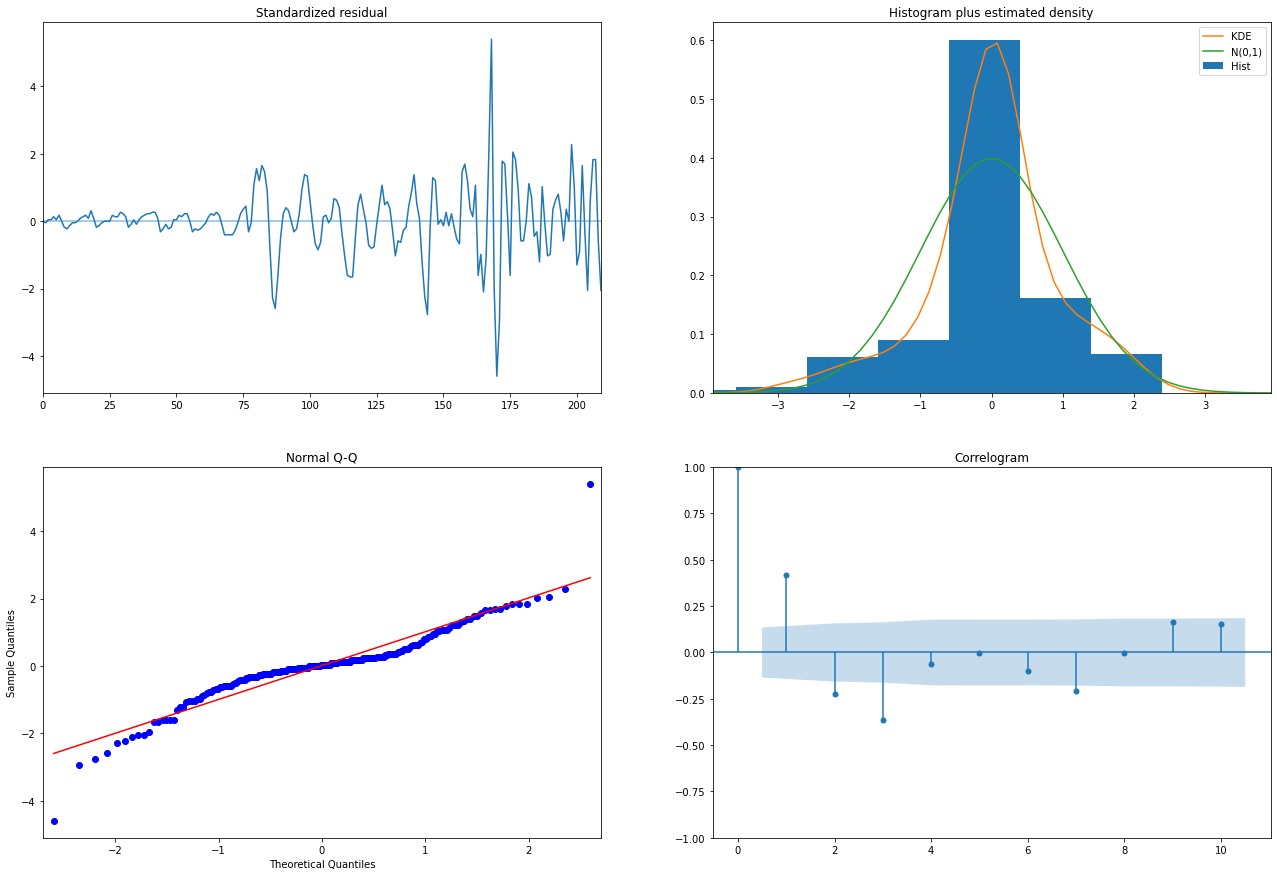

In [38]:
#visulaize model
r5_autoarima.plot_diagnostics(figsize=(22,15))
plt.show()

KDE appears normally distributed, with residuals appearing to satisfy homoscedasticity, or homogeneity of variances.

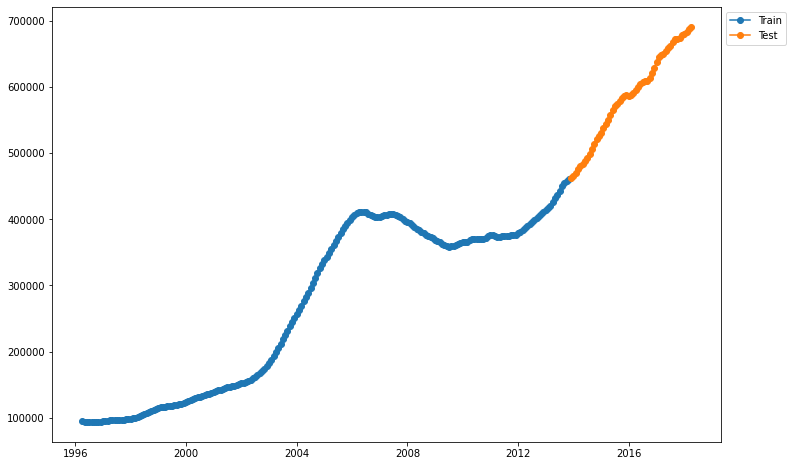

In [39]:
# Train Test Split Index
train_size = 0.8
split_idx = round(len(melted_r1)* train_size)
split_idx

# Split
r1_train = melted_r1.iloc[:split_idx]
r1_test = melted_r1.iloc[split_idx:]

# Visualize split
fig,ax= plt.subplots(figsize=(12,8))
kws = dict(marker='o')
plt.plot(r1_train, label='Train', **kws)
plt.plot(r1_test, label='Test', **kws)
ax.legend(bbox_to_anchor=[1,1]);

In [40]:
#stepwise search of best parameters according to AIC
r1_autoarima = auto_arima(r1_train, start_p=0, start_q=0, d=None,
                          information_criterion='aic', max_d=3, max_q=3,
                          max_p=3, start_P=0, start_Q=0, D=None, max_P=3, max_Q=3,
                          max_D=3, trace=True, stepwise=True 
                          
                         )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3922.435, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3907.747, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3900.061, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3997.673, Time=0.01 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3834.331, Time=0.26 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3838.212, Time=0.23 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3838.254, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3889.031, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3877.505, Time=0.28 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4422.335, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3847.653, Time=0.10 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.651 seconds


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


In [41]:
r1_autoarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  212
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1913.166
Date:                Wed, 17 Aug 2022   AIC                           3834.331
Time:                        10:01:14   BIC                           3847.739
Sample:                             0   HQIC                          3839.751
                                - 212                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    114.6083     51.048      2.245      0.025      14.556     214.661
ar.L1          0.9088      0.021     42.956      0.000       0.867       0.950
ma.L1         -0.8319      0.025    -33.165      0.000      -0.881      -0.783
sigma2      3.945e+06      0.001   4.55e+09      0.000    3.95e+06    3.95e+06
===================================================================================
Ljung-Box (L1) (Q):                 173.38   Jarque-Bera (JB):                45.96
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.58
Prob(H) (two-sided):                  0.21   Kurtosis:                         4.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.44e+25. Standard errors may be unstable.
"""

The model returned the optimal terms (1, 1, 1) with an AIC value of 3834.331. The ar, ma, and sigma terms appear statistically significant.

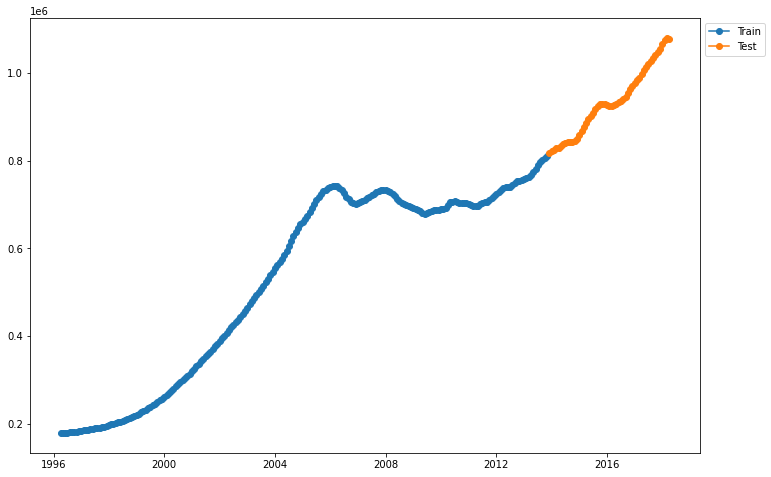

In [42]:
# Train Test Split Index
train_size = 0.8
split_idx = round(len(melted_r2)* train_size)
split_idx

# Split
r2_train = melted_r2.iloc[:split_idx]
r2_test = melted_r2.iloc[split_idx:]

# Visualize split
fig,ax= plt.subplots(figsize=(12,8))
kws = dict(marker='o')
plt.plot(r2_train, label='Train', **kws)
plt.plot(r2_test, label='Test', **kws)
ax.legend(bbox_to_anchor=[1,1]);

In [43]:
#stepwise search of best parameters according to AIC
r2_autoarima = auto_arima(r2_train, start_p=0, start_q=0, d=None,
                          information_criterion='aic', max_d=3, max_q=3,
                          max_p=3, start_P=0, start_Q=0, D=None, max_P=3, max_Q=3,
                          max_D=3, trace=True, stepwise=True 
                          
                         )

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3527.918, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=3527.700, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=3551.885, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=3529.351, Time=0.09 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,2,1)(0,0,0)[0]             : AIC=3553.756, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=3529.492, Time=0.09 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.499 seconds


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


In [44]:
r2_autoarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  212
Model:               SARIMAX(1, 2, 0)   Log Likelihood               -1761.850
Date:                Wed, 17 Aug 2022   AIC                           3527.700
Time:                        10:01:15   BIC                           3534.395
Sample:                             0   HQIC                          3530.407
                                - 212                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0210      0.009      2.215      0.027       0.002       0.040
sigma2      1.123e+06   7.37e+04     15.243      0.000    9.79e+05    1.27e+06
===================================================================================
Ljung-Box (L1) (Q):                  51.23   Jarque-Bera (JB):                52.51
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              39.36   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Model returned (1, 2, 1) terms. AR and sigma term both appear statistically significant. AIC value is reduced to 3527.7

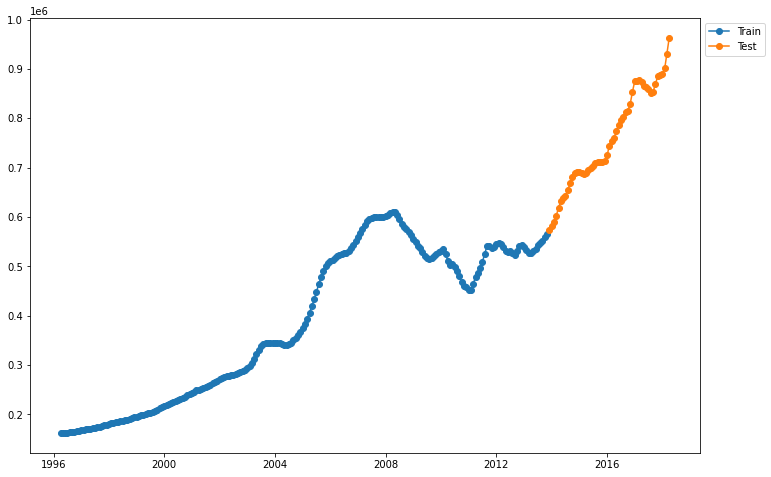

In [45]:
# Train Test Split Index
train_size = 0.8
split_idx = round(len(melted_r3)* train_size)
split_idx

# Split
r3_train = melted_r3.iloc[:split_idx]
r3_test = melted_r3.iloc[split_idx:]

# Visualize split
fig,ax= plt.subplots(figsize=(12,8))
kws = dict(marker='o')
plt.plot(r3_train, label='Train', **kws)
plt.plot(r3_test, label='Test', **kws)
ax.legend(bbox_to_anchor=[1,1]);

In [46]:
#stepwise search of best parameters according to AIC
r3_autoarima = auto_arima(r3_train, start_p=0, start_q=0, d=None,
                          information_criterion='aic', max_d=3, max_q=3,
                          max_p=3, start_P=0, start_Q=0, D=None, max_P=3, max_Q=3,
                          max_D=3, trace=True, stepwise=True 
                          
                         )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4219.759, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4193.583, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4212.011, Time=0.04 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4243.886, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4192.954, Time=0.21 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4192.897, Time=0.18 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4204.116, Time=0.32 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4187.003, Time=0.33 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4185.081, Time=0.28 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4215.560, Time=0.39 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4220.819, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4193.678, Time=0.21 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 2.633 seconds


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


In [47]:
r3_autoarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  212
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2088.541
Date:                Wed, 17 Aug 2022   AIC                           4185.081
Time:                        10:01:18   BIC                           4198.489
Sample:                             0   HQIC                          4190.501
                                - 212                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    518.5772    197.540      2.625      0.009     131.406     905.748
ar.L1          0.6785      0.065     10.380      0.000       0.550       0.807
ma.L1         -0.5632      0.070     -8.058      0.000      -0.700      -0.426
sigma2      2.293e+07      0.002   1.07e+10      0.000    2.29e+07    2.29e+07
===================================================================================
Ljung-Box (L1) (Q):                 116.71   Jarque-Bera (JB):                52.81
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.32   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.58e+25. Standard errors may be unstable.
"""

Model returned terms (1, 1, 1). All terms appear statistically significant.

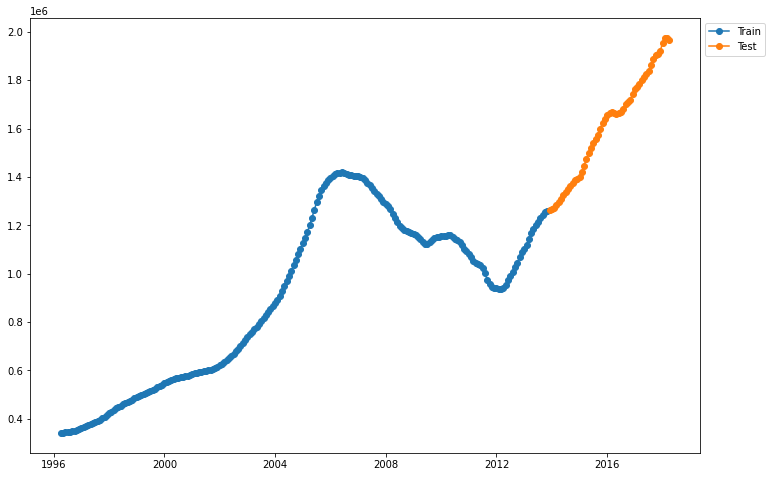

In [48]:
# Train Test Split Index
train_size = 0.8
split_idx = round(len(melted_r4)* train_size)
split_idx

# Split
r4_train = melted_r4.iloc[:split_idx]
r4_test = melted_r4.iloc[split_idx:]

# Visualize split
fig,ax= plt.subplots(figsize=(12,8))
kws = dict(marker='o')
plt.plot(r4_train, label='Train', **kws)
plt.plot(r4_test, label='Test', **kws)
ax.legend(bbox_to_anchor=[1,1]);

In [49]:
#stepwise search of best parameters according to AIC
r4_autoarima = auto_arima(r4_train, start_p=0, start_q=0, d=None,
                          information_criterion='aic', max_d=3, max_q=3,
                          max_p=3, start_P=0, start_Q=0, D=None, max_P=3, max_Q=3,
                          max_D=3, trace=True, stepwise=True 
                          
                         )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4523.203, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4489.163, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4496.433, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4552.877, Time=0.01 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4482.309, Time=0.22 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4471.360, Time=0.25 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4452.191, Time=0.33 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4442.244, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4440.464, Time=0.19 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4527.843, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4482.520, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7089.505, Time=0.37 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4439.355, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4519.564, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4508.839, Time=0.07 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.22 sec


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.36 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=4502.421, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=4487.365, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.46 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 3.730 seconds


In [50]:
r4_autoarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  212
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2216.677
Date:                Wed, 17 Aug 2022   AIC                           4439.355
Time:                        10:01:22   BIC                           4449.410
Sample:                             0   HQIC                          4443.419
                                - 212                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9066      0.021     42.848      0.000       0.865       0.948
ma.L1         -0.8234      0.027    -30.563      0.000      -0.876      -0.771
sigma2       7.76e+07   3.92e-11   1.98e+18      0.000    7.76e+07    7.76e+07
===================================================================================
Ljung-Box (L1) (Q):                 174.65   Jarque-Bera (JB):                45.31
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.56   Skew:                            -0.61
Prob(H) (two-sided):                  0.06   Kurtosis:                         4.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number  4e+33. Standard errors may be unstable.
"""

Model returned parameters of (1, 1, 1). AR, MA, and sigma terms are all statistically significant. AIC minimized to 4439.355.

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


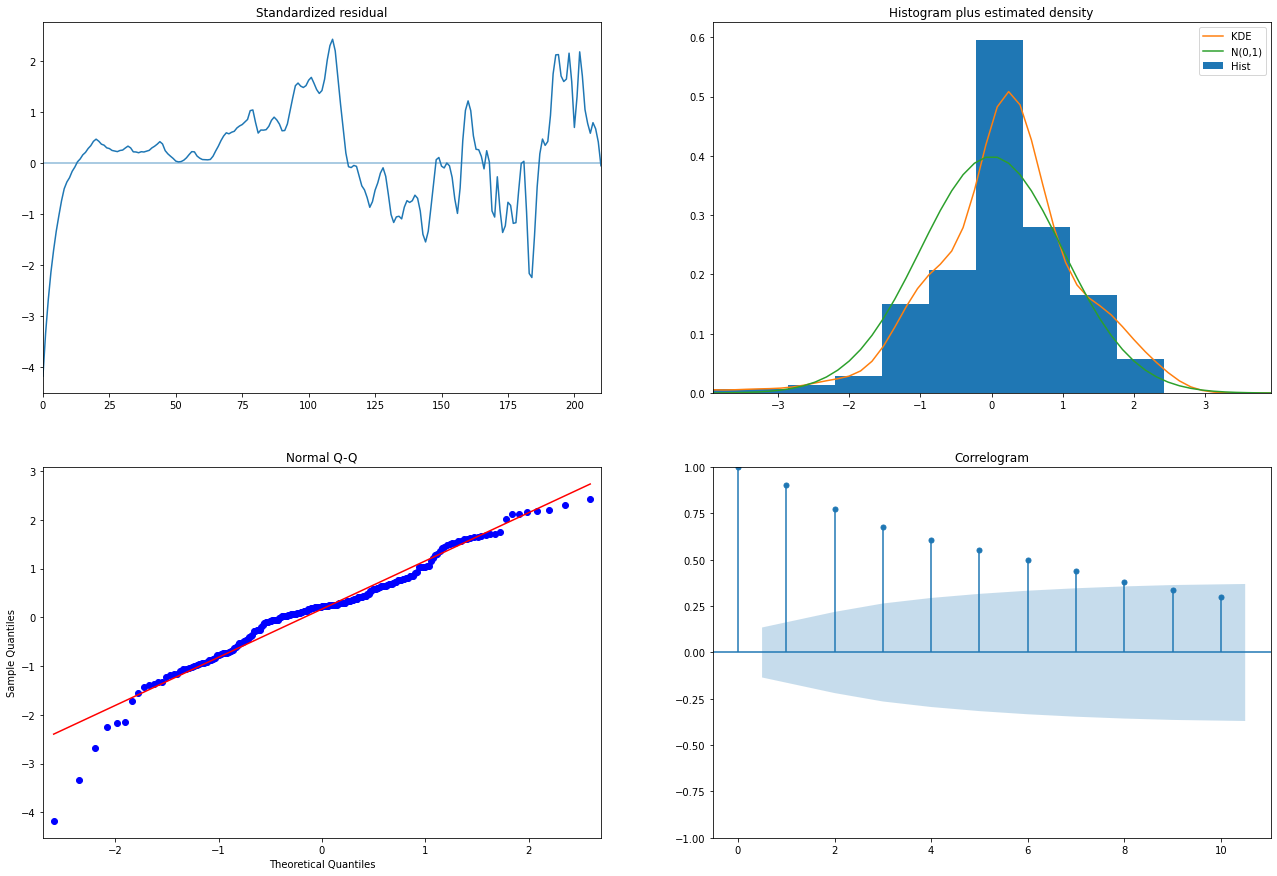

In [51]:
r4_autoarima.plot_diagnostics(figsize=(22,15))
plt.show()

## Region 5 forecasting
With each model trained, I will now predict over the test set to validate our results.

In [52]:
#predict over test period
r5_preds = r5_autoarima.predict(n_periods=r5_test.shape[0], return_conf_int=True)

In [53]:
r5_preds

(array([ 815700.,  822400.,  829100.,  835800.,  842500.,  849200.,
         855900.,  862600.,  869300.,  876000.,  882700.,  889400.,
         896100.,  902800.,  909500.,  916200.,  922900.,  929600.,
         936300.,  943000.,  949700.,  956400.,  963100.,  969800.,
         976500.,  983200.,  989900.,  996600., 1003300., 1010000.,
        1016700., 1023400., 1030100., 1036800., 1043500., 1050200.,
        1056900., 1063600., 1070300., 1077000., 1083700., 1090400.,
        1097100., 1103800., 1110500., 1117200., 1123900., 1130600.,
        1137300., 1144000., 1150700., 1157400., 1164100.]),
 array([[ 811308.50703232,  820091.49296768],
        [ 812580.32320155,  832219.67679845],
        [ 812668.5378985 ,  845531.4621015 ],
        [ 811746.80240475,  859853.19759525],
        [ 809931.81649698,  875068.18350302],
        [ 807307.8270538 ,  891092.1729462 ],
        [ 803939.15447253,  907860.84552747],
        [ 799876.93455368,  925323.06544632],
        [ 795163.06596382,  

In [54]:
#put forecasts in DF
r5_forecastdf = pd.DataFrame(r5_preds[0], index=r5_test.index, columns=['prediction'])

In [55]:
r5_forecastdf.shape[0]

53

In [56]:
r5_forecastdf

,prediction
time,
2013-12-01,815700.0
2014-01-01,822400.0
2014-02-01,829100.0
2014-03-01,835800.0
2014-04-01,842500.0
2014-05-01,849200.0
2014-06-01,855900.0
2014-07-01,862600.0
2014-08-01,869300.0


<AxesSubplot:xlabel='time'>

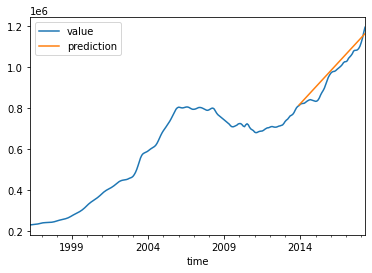

In [57]:
#visualize prediction
pd.concat([melted_r5['value'], r5_forecastdf], axis=1).plot()

The model predicted well over the test set. Now, the model will predict over a 3 year investment horizon.

In [58]:
periods = r5_forecastdf.shape[0] + 36
periods

89

In [59]:
r5_future_forecast = r5_autoarima.predict(n_periods=periods,
                                         return_conf_int=True)
#test data + 3 year forecast

In [60]:
#forecast into investment horizon of 3 years
r5_forecast_range = pd.date_range(start='2014-02-01', 
                                  periods=periods,
                                 freq='MS') #three years


In [61]:
r5_forecast_range

DatetimeIndex(['2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01',
               '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01',
               '2014-10-01', '2014-11-01', '2014-12-01', '2015-01-01',
               '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01',
               '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01',
               '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01',
               '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01',
               '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01',
               '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01',
               '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01',
               '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01',
               '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01',
               '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
               '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
      

In [62]:
r5_future_forecast

(array([ 815700.,  822400.,  829100.,  835800.,  842500.,  849200.,
         855900.,  862600.,  869300.,  876000.,  882700.,  889400.,
         896100.,  902800.,  909500.,  916200.,  922900.,  929600.,
         936300.,  943000.,  949700.,  956400.,  963100.,  969800.,
         976500.,  983200.,  989900.,  996600., 1003300., 1010000.,
        1016700., 1023400., 1030100., 1036800., 1043500., 1050200.,
        1056900., 1063600., 1070300., 1077000., 1083700., 1090400.,
        1097100., 1103800., 1110500., 1117200., 1123900., 1130600.,
        1137300., 1144000., 1150700., 1157400., 1164100., 1170800.,
        1177500., 1184200., 1190900., 1197600., 1204300., 1211000.,
        1217700., 1224400., 1231100., 1237800., 1244500., 1251200.,
        1257900., 1264600., 1271300., 1278000., 1284700., 1291400.,
        1298100., 1304800., 1311500., 1318200., 1324900., 1331600.,
        1338300., 1345000., 1351700., 1358400., 1365100., 1371800.,
        1378500., 1385200., 1391900., 1398600., 

In [63]:
#put forecasts in DF
r5_future_forecastdf = pd.DataFrame(r5_future_forecast[0], index=r5_forecast_range,
                                   columns=['prediction'])

<AxesSubplot:>

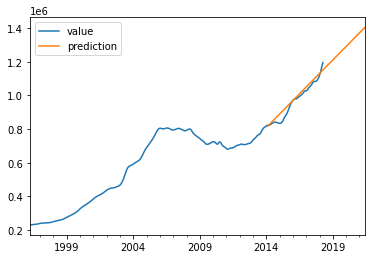

In [64]:
#visualize prediction
pd.concat([melted_r5['value'], r5_future_forecastdf], axis=1).plot()

In [65]:
#define confidence intervals
lower_r5 = pd.Series(r5_future_forecast[1][:,0], index=r5_forecast_range)
upper_r5 = pd.Series(r5_future_forecast[1][:,1], index=r5_forecast_range)

Text(0.5, 1.0, 'Region 5')

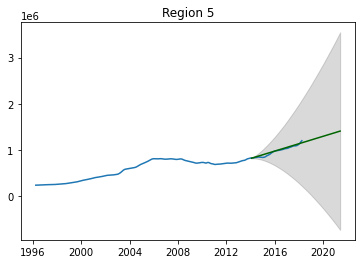

In [66]:
#visualize forecasts with confidence intervals
plt.plot(melted_r5['value'])
plt.plot(r5_future_forecastdf, color='darkgreen')
plt.fill_between(r5_forecast_range,
                lower_r5,
                upper_r5,
                color='k', alpha=.15)
plt.title('Region 5')

Region 5 forecasts are visualized above, along with the predictions' confidence intervals as indicated by the gray area. 

## Region 4 Forecasting

In [67]:
#predict over the test data
r4_preds = r4_autoarima.predict(n_periods=r4_test.shape[0], return_conf_int=True)

In [68]:
r4_preds

(array([1266551.92668058, 1272310.62633908, 1277531.50237001,
        1282264.78386526, 1286556.00885904, 1290446.46244092,
        1293973.57395212, 1297171.27708637, 1300070.33635976,
        1302698.6430905 , 1305081.48373615, 1307241.78317008,
        1309200.3252374 , 1310975.95271256, 1312585.74858223,
        1314045.20039758, 1315368.34927717, 1316567.92499399,
        1317655.46844627, 1318641.44269033, 1319535.33360377,
        1320345.74114731, 1321080.46210348, 1321746.56508799,
        1322350.45855565, 1322897.95245489, 1323394.3141242 ,
        1323844.3189683 , 1324252.29640134, 1324622.17149947,
        1324957.50276327, 1325261.51635338, 1325537.13712887,
        1325787.01678673, 1326013.55937338, 1326218.94441353,
        1326405.14787904, 1326573.96119934, 1326727.00849646,
        1326865.76221041, 1326991.55726525, 1327105.60391216,
        1327208.99937304, 1327302.73839668, 1327387.72282906,
        1327464.77028982, 1327534.62203848, 1327597.95010591,
        

In [69]:
#put predictions into DF
r4_forecastdf = pd.DataFrame(r4_preds[0], index=r4_test.index, columns=['prediction'])
r4_forecastdf.head(10)

,prediction
time,
2013-12-01,1.266552e+06
2014-01-01,1.272311e+06
2014-02-01,1.277532e+06
2014-03-01,1.282265e+06
2014-04-01,1.286556e+06
2014-05-01,1.290446e+06
2014-06-01,1.293974e+06
2014-07-01,1.297171e+06
2014-08-01,1.300070e+06


<AxesSubplot:xlabel='time'>

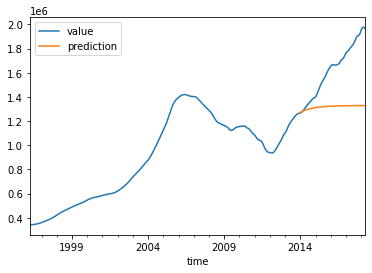

In [70]:
#visulaize
pd.concat([melted_r4['value'], r4_forecastdf], axis=1).plot()

Predictions fell short of the test data. 

In [71]:
periods = r4_forecastdf.shape[0] + 36
periods

89

In [72]:
r4_future_forecast = r4_autoarima.predict(n_periods=periods,
                                         return_conf_int=True)
#test data + 3 year forecast

In [73]:
#forecast into investment horizon of 3 years
r4_forecast_range = pd.date_range(start='2014-02-01', 
                                  periods=periods,
                                 freq='MS') #three years


In [74]:
r4_future_forecastdf = pd.DataFrame(r4_future_forecast[0], index=r4_forecast_range,
                                   columns=['prediction'])

<AxesSubplot:>

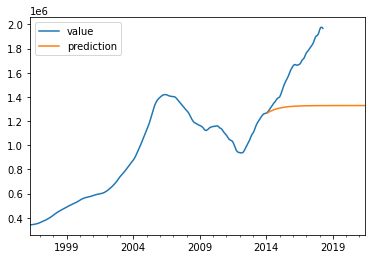

In [75]:

pd.concat([melted_r4['value'], r4_future_forecastdf], axis=1).plot()

In [76]:
#define confidence intervals
lower_r4 = pd.Series(r4_future_forecast[1][:,0], index=r4_forecast_range)
upper_r4 = pd.Series(r4_future_forecast[1][:,1], index=r4_forecast_range)

Text(0.5, 1.0, 'Region 4')

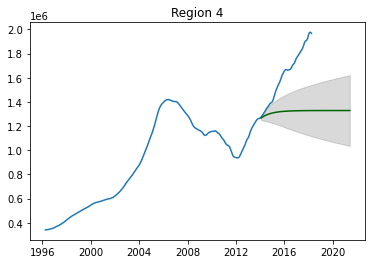

In [77]:
#visualize forecasts with confidence intervals
plt.plot(melted_r4['value'])
plt.plot(r4_future_forecastdf, color='darkgreen')
plt.fill_between(r4_forecast_range,
                lower_r4,
                upper_r4,
                color='k', alpha=.15)
plt.title('Region 4')

## Region 3 Forecasting

In [78]:
#predict over test data
r3_preds = r3_autoarima.predict(n_periods=r3_test.shape[0], return_conf_int=True)

In [79]:
r3_forecastdf = pd.DataFrame(r3_preds[0], index=r3_test.index, columns=['prediction'])
r3_forecastdf.head(10)

,prediction
time,
2013-12-01,569075.924750
2014-01-01,571545.707463
2014-02-01,573739.938257
2014-03-01,575747.217556
2014-04-01,577627.657380
2014-05-01,579422.041445
2014-06-01,581158.039951
2014-07-01,582854.426077
2014-08-01,584523.936711


<AxesSubplot:xlabel='time'>

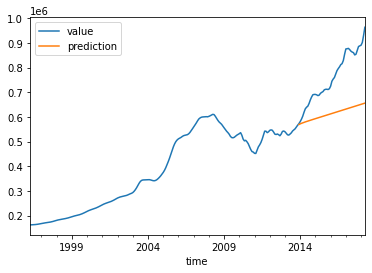

In [80]:
#visualize
pd.concat([melted_r3['value'], r3_forecastdf], axis=1).plot()

In [81]:
periods = r3_forecastdf.shape[0] + 36
periods

89

In [82]:
r3_future_forecast = r3_autoarima.predict(n_periods=periods,
                                         return_conf_int=True)
#test data + 3 year forecast

In [83]:
#forecast into investment horizon of 3 years
r3_forecast_range = pd.date_range(start='2014-02-01', 
                                  periods=periods,
                                 freq='MS') #three years


In [84]:
r3_future_forecastdf = pd.DataFrame(r3_future_forecast[0], index=r3_forecast_range,
                                   columns=['prediction'])

<AxesSubplot:>

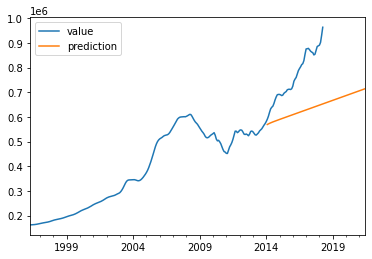

In [85]:
r3_combo = pd.concat([melted_r3['value'], r3_future_forecastdf], axis=1)
r3_combo.plot()

In [86]:
lower_r3 = pd.Series(r3_future_forecast[1][:,0], index=r3_forecast_range)
upper_r3 = pd.Series(r3_future_forecast[1][:,1], index=r3_forecast_range)

Text(0.5, 1.0, 'Region 3')

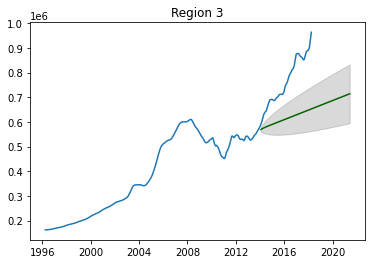

In [87]:
plt.plot(melted_r3['value'])
plt.plot(r3_future_forecastdf, color='darkgreen')
plt.fill_between(r3_forecast_range,
                lower_r3,
                upper_r3,
                color='k', alpha=.15)
plt.title('Region 3')

## Region 2 Forecasting

In [88]:
r2_preds = r2_autoarima.predict(n_periods=r2_test.shape[0], return_conf_int=True)

In [89]:
r2_forecastdf = pd.DataFrame(r2_preds[0], index=r2_test.index, columns=['prediction'])
r2_forecastdf.head(10)

,prediction
time,
2013-12-01,818039.883070
2014-01-01,824180.603330
2014-02-01,830321.341163
2014-03-01,836462.079365
2014-04-01,842602.817575
2014-05-01,848743.555784
2014-06-01,854884.293994
2014-07-01,861025.032204
2014-08-01,867165.770414


<AxesSubplot:xlabel='time'>

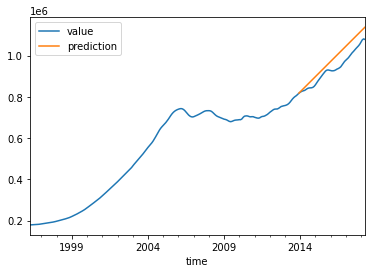

In [90]:
pd.concat([melted_r2['value'], r2_forecastdf], axis=1).plot()

In [91]:
periods = r2_forecastdf.shape[0] + 36
periods

89

In [92]:
r2_future_forecast = r2_autoarima.predict(n_periods=periods,
                                         return_conf_int=True)
#test data + 3 year forecast

In [93]:
#forecast into investment horizon of 3 years
r2_forecast_range = pd.date_range(start='2014-02-01', 
                                  periods=periods,
                                 freq='MS') #three years


In [94]:
r2_future_forecastdf = pd.DataFrame(r2_future_forecast[0], index=r2_forecast_range,
                                   columns=['prediction'])

<AxesSubplot:>

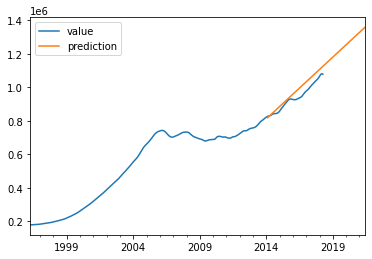

In [95]:
r2_combo = pd.concat([melted_r2['value'], r2_future_forecastdf], axis=1)
r2_combo.plot()

In [96]:
lower_r2 = pd.Series(r2_future_forecast[1][:,0], index=r2_forecast_range)
upper_r2 = pd.Series(r2_future_forecast[1][:,1], index=r2_forecast_range)

Text(0.5, 1.0, 'Region 2')

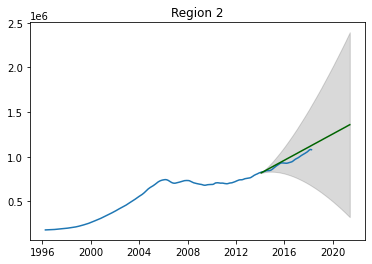

In [97]:
plt.plot(melted_r2['value'])
plt.plot(r2_future_forecastdf, color='darkgreen')
plt.fill_between(r2_forecast_range,
                lower_r2,
                upper_r2,
                color='k', alpha=.15)
plt.title('Region 2')

## Region 1 Forecasting

In [98]:
r1_preds = r1_autoarima.predict(n_periods=r1_test.shape[0], return_conf_int=True)

In [99]:
r1_forecastdf = pd.DataFrame(r1_preds[0], index=r1_test.index, columns=['prediction'])
r1_forecastdf.head(10)

,prediction
time,
2013-12-01,462787.807881
2014-01-01,465254.164990
2014-02-01,467610.150031
2014-03-01,469865.831116
2014-04-01,472030.357941
2014-05-01,474112.045575
2014-06-01,476118.450585
2014-07-01,478056.440232
2014-08-01,479932.255345


<AxesSubplot:xlabel='time'>

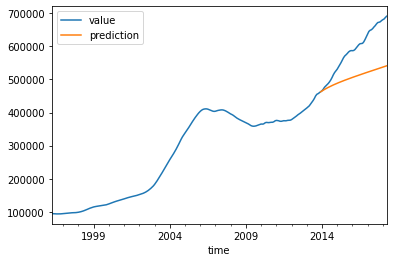

In [100]:
pd.concat([melted_r1['value'], r1_forecastdf], axis=1).plot()

In [101]:
periods = r1_forecastdf.shape[0] + 36
periods

89

In [102]:
r1_future_forecast = r1_autoarima.predict(n_periods=periods,
                                         return_conf_int=True)
#test data + 3 year forecast

In [103]:
#forecast into investment horizon of 3 years
r1_forecast_range = pd.date_range(start='2014-02-01', 
                                  periods=periods,
                                 freq='MS') #three years


In [104]:
r1_future_forecastdf = pd.DataFrame(r1_future_forecast[0], index=r1_forecast_range,
                                   columns=['prediction'])

<AxesSubplot:>

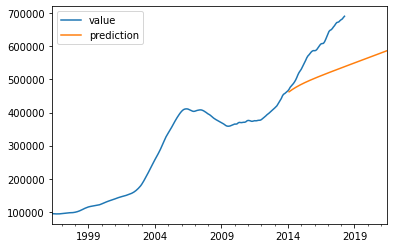

In [105]:
r1_combo = pd.concat([melted_r1['value'], r1_future_forecastdf], axis=1)
r1_combo.plot()

In [106]:
lower_r1 = pd.Series(r1_future_forecast[1][:,0], index=r1_forecast_range)
upper_r1 = pd.Series(r1_future_forecast[1][:,1], index=r1_forecast_range)

Text(0.5, 1.0, 'Region 1')

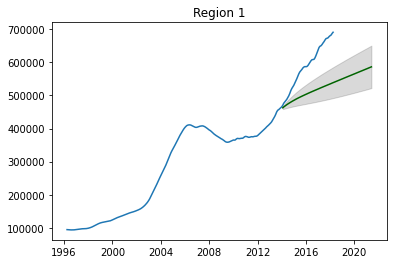

In [107]:
plt.plot(melted_r1['value'])
plt.plot(r1_future_forecastdf, color='darkgreen')
plt.fill_between(r1_forecast_range,
                lower_r1,
                upper_r1,
                color='k', alpha=.15)
plt.title('Region 1')

# Interpreting Results

In [108]:
r5_future_forecastdf

,prediction
2014-02-01,815700.0
2014-03-01,822400.0
2014-04-01,829100.0
2014-05-01,835800.0
2014-06-01,842500.0
...,...
2021-02-01,1378500.0
2021-03-01,1385200.0
2021-04-01,1391900.0
2021-05-01,1398600.0


In [109]:
r5_future_forecastdf['prediction'][-1]

1405300.0

In [110]:
#calculate r5_ROI for forecasted investment horizon
r5_ROI = (r5_future_forecastdf['prediction'][-1] / r5_future_forecastdf['prediction'][0]) - 1
r5_ROI


0.7228147603285522

In [111]:
#calculate r4_ROI for forecasted investment horizon
r4_ROI = r4_future_forecastdf['prediction'][-1] / r4_future_forecastdf['prediction'][0] - 1
r4_ROI

0.04867525458090727

In [112]:
#calculate r3_ROI for forecasted investment horizon
r3_ROI = r3_future_forecastdf['prediction'][-1] / r3_future_forecastdf['prediction'][0] - 1
r3_ROI

0.25408178404556203

In [113]:
#calculate r2_ROI for forecasted investment horizon
r2_ROI = r2_future_forecastdf['prediction'][-1] / r2_future_forecastdf['prediction'][0] - 1
r2_ROI

0.6605850830928426

In [114]:
#calculate r1_ROI for forecasted investment horizon
r1_ROI = r1_future_forecastdf['prediction'][-1] / r1_future_forecastdf['prediction'][0] - 1
r1_ROI

0.26756188356187605

In [115]:
df_ROI = [r1_ROI, r2_ROI, r3_ROI, r4_ROI, r5_ROI]
df_ROI

[0.26756188356187605,
 0.6605850830928426,
 0.25408178404556203,
 0.04867525458090727,
 0.7228147603285522]

In [116]:
index_label = ['r1', 'r2', 'r3', 'r4', 'r5']

In [117]:
#create dataframe for ROI
dfROI = pd.DataFrame(data=df_ROI, index=index_label)
dfROI

,0
r1,0.267562
r2,0.660585
r3,0.254082
r4,0.048675
r5,0.722815


In [118]:
dfROI.rename(columns={0:'Return on Investment'}, inplace=True)
dfROI

,Return on Investment
r1,0.267562
r2,0.660585
r3,0.254082
r4,0.048675
r5,0.722815


Region 2 and 5 are forecasted to yield the largest return on investment at 0.66 and 0.72, respectively

In [119]:
#define risk free rate
riskfree = 0.0248

In [120]:
#get holding period returns
r1_monthly = r1_future_forecastdf.pct_change()
r1_monthly.head()

,prediction
2014-02-01,NaN
2014-03-01,0.005329
2014-04-01,0.005064
2014-05-01,0.004824
2014-06-01,0.004607


In [121]:
#calculate sharpe ratio
r1_std = np.std(r1_monthly)
r1_sharpe = (dfROI['Return on Investment'][0] - riskfree) / r1_std
r1_sharpe

prediction    343.902019
dtype: float64

In [122]:
#give holding period returns
r2_monthly = r2_future_forecastdf.pct_change()
r2_monthly.head()

,prediction
2014-02-01,NaN
2014-03-01,0.007507
2014-04-01,0.007451
2014-05-01,0.007396
2014-06-01,0.007341


In [123]:
r2_std = np.std(r2_monthly)

In [124]:
#Sharpe Ratio calculation
r2_sharpe = (dfROI['Return on Investment'][1] - riskfree) / r2_std
r2_sharpe

prediction    745.895115
dtype: float64

In [125]:
#calculate holding period returns
r3_monthly = r3_future_forecastdf.pct_change()
r3_monthly.head()

,prediction
2014-02-01,NaN
2014-03-01,0.004340
2014-04-01,0.003839
2014-05-01,0.003499
2014-06-01,0.003266


In [126]:
#calculate sharpe ratio
r3_std = np.std(r3_monthly)
r3_sharpe = (dfROI['Return on Investment'][2] - riskfree) / r3_std
r3_sharpe

prediction    719.283959
dtype: float64

In [127]:
#calculate holding period returns for r4
r4_monthly = r4_future_forecastdf.pct_change()
r4_monthly.head()

,prediction
2014-02-01,NaN
2014-03-01,0.004547
2014-04-01,0.004103
2014-05-01,0.003705
2014-06-01,0.003347


In [128]:
#calculate sharpe ratio
r4_std = np.std(r4_monthly)
r4_sharpe = (dfROI['Return on Investment'][3] - riskfree) / r4_std
r4_sharpe

prediction    24.000569
dtype: float64

In [129]:
#holding period returns for r5
r5_monthly = r5_future_forecastdf.pct_change()
r5_monthly.head()

,prediction
2014-02-01,NaN
2014-03-01,0.008214
2014-04-01,0.008147
2014-05-01,0.008081
2014-06-01,0.008016


In [130]:
r5_std = np.std(r5_monthly)

In [131]:
#calculate sharpe ratio
r5_sharpe = (dfROI['Return on Investment'][4] - riskfree) / r5_std
r5_sharpe

prediction    711.097921
dtype: float64

In [132]:
#create datafram for sharpe ratios
dfSharpe = [r1_sharpe, r2_sharpe, r3_sharpe, r4_sharpe, r5_sharpe]
indexlabels = ['r1', 'r2', 'r3', 'r4', 'r5']
df_Sharpe = pd.DataFrame(data=dfSharpe, index=indexlabels)
df_Sharpe.head()

,prediction
r1,343.902019
r2,745.895115
r3,719.283959
r4,24.000569
r5,711.097921


In [133]:
df_Sharpe.rename(columns={'prediction': 'Sharpe Ratio'}, inplace=True)
df_Sharpe

,Sharpe Ratio
r1,343.902019
r2,745.895115
r3,719.283959
r4,24.000569
r5,711.097921


An investment's sharpe ratio reveals the investment's return per unit of risk. It allows investors to evaluate returns on a risk adjusted basis. Here, region 2 has the highest risk adjusted return. 
<br>

In other words, for the amount of risk taken, region 2 should have the best expected return.

## Recommendations

Analyzing the forecasted ROI and sharpe ratio, I recommend to the firm:
<br>
1. Invest in region 1, 2, 3, and 5.
2. Do not invest in region 4
<br>

Regions 1, 2, 3, and 5 forecast ROI with efficient risk adjusted return. However, region 4 does not provide efficient risk adjusted return. Moreover, region 4 showed the lowest return on investment over the forecasted period.

## Limitations

Real estate prices are not just a function of time, but a relationship between supply and demand not fully captured by this analysis. Including exogenous variables such as interest rates, housing supply, or population growth would likely yield a better forecast. However, this falls outside the scope of this project. 
<br>

Sampling the top 50 zip codes by size rank during EDA allowed us to somewhat capture qualitative factors not included. 